In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=50)

In [2]:
faces

{'data': array([[0.00130719, 0.00261438, 0.00130719, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.08366013, 0.07973856,
         0.05882353],
        [0.        , 0.        , 0.        , ..., 0.00130719, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.12287582, 0.1267974 ,
         0.12287582],
        [0.00915033, 0.23660131, 0.29411766, ..., 0.01830065, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'images': array([[[0.00130719, 0.00261438, 0.00130719, ..., 0.17385621,
          0.02875817, 0.        ],
         [0.00130719, 0.00261438, 0.00130719, ..., 0.1633987 ,
          0.02614379, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15424837,
          0.03398693, 0.        ],
         ...,
         [0.        , 0.0248366 , 0.15424837, ..., 0.16732027,
     

In [3]:
faces.data.shape #(data,images)

(1560, 2914)

In [6]:
faces.images[0].shape #face 1.... 62*47=2914

(62, 47)

In [7]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [14]:
faces.target_names.size

12

In [15]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [18]:
faces.target_names[1]

'Colin Powell'

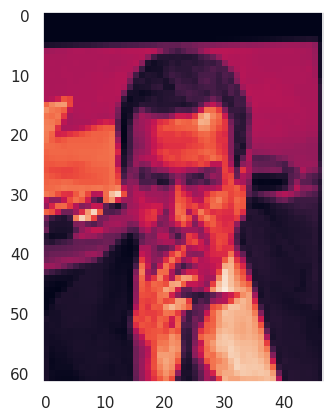

In [21]:
plt.grid(None)
plt.imshow(faces.images[1])
#hese color values if they are flatten out then that's what that is they are in faces.data variable.

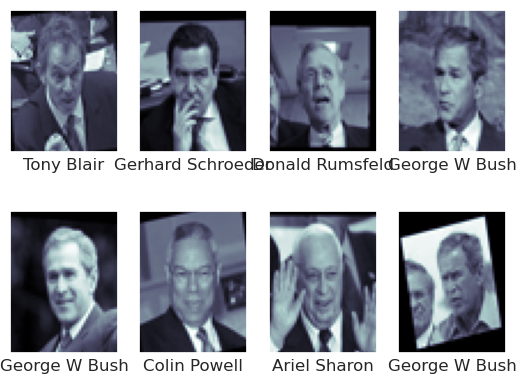

In [35]:
fig, ax=plt.subplots(2,4)
for idx ,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [36]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [37]:
pcaModel=PCA(n_components=150,whiten=True)
svmModel=SVC(kernel='rbf',class_weight='balanced')
mdl=make_pipeline(pcaModel,svmModel)

In [38]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,test_size=0.2)

"""
there are a lot of hyper parameters that are involved there in support vector machine for example
there is a value called C that controls the regularization and there is a value called gamma that actually
controls the the variance of this RBF kernel
So there are certain hyper parameters and we do not know which one is the best. Thus use gridsearch to find best
"""

In [39]:
from sklearn.model_selection import GridSearchCV #CV===cross validation
param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl,param_grid) #for finding optimal hyperparameters

In [40]:
grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [41]:
grid.best_params_

{'svc__C': 30, 'svc__gamma': 0.005}

In [42]:
mdl=grid.best_estimator_ #we find best model

In [43]:
y_pred=mdl.predict(Xtest)

In [44]:
ytest

array([ 4,  7,  1,  3,  1,  3,  5,  3,  3,  3, 10,  8,  8,  3,  4,  1,  3,
       11,  3,  3,  1,  1,  6,  1,  3,  1,  3,  8, 11,  0, 10,  7,  7,  1,
        2,  0,  8,  2,  1,  1,  1,  7, 11,  5, 11,  6,  4,  3,  1,  2,  4,
        3,  4, 11,  3,  3,  0,  1,  1,  1,  1,  7,  3,  3,  3,  0,  4,  5,
        1,  4,  1,  3,  5,  3,  5,  1,  1,  3,  8,  9,  1,  6,  3,  3,  4,
        7, 11,  5,  4,  3, 11, 11,  6, 11,  3,  2, 11,  5,  0, 10,  4,  3,
        8,  5,  3,  3,  5,  2,  3,  3,  5,  2,  2,  2, 11, 11,  0,  3,  3,
        0,  2,  0,  5,  3,  9,  7,  3,  0,  3,  4, 11, 11,  5,  1,  3,  2,
        4,  3,  3, 11,  3,  9,  1,  5,  6,  2,  1,  3,  2, 11,  5,  0,  2,
        4,  3,  2,  1,  4,  3,  0,  7,  6,  3, 11,  8,  1, 11,  3,  2, 11,
        3,  9,  6,  3,  3,  3,  3,  3,  3,  5,  9,  3,  3,  0,  3,  7,  1,
        5,  4,  1,  6,  3,  2,  3,  3,  3,  7,  3,  3,  3,  3,  7, 11,  0,
        4,  4,  8,  3,  3,  1,  1,  3,  9,  3,  4, 11, 11,  9, 10,  3,  6,
        1,  3,  3,  8,  3

In [45]:
y_pred

array([ 4, 11,  1,  2,  1,  3,  5,  3,  3,  3, 10,  3,  8,  3,  4,  3,  3,
        2,  3,  3,  3,  3,  1,  1,  3,  1,  3,  3,  3,  1, 10,  1,  6,  1,
        2,  1,  8,  3,  1,  1,  1, 11, 11, 11, 11,  3, 11,  3,  2,  2,  4,
        3,  3, 11,  3,  3,  1,  1,  1,  1,  1,  3,  3,  3,  3,  0, 11,  5,
        1,  4,  1,  3,  4,  3,  3,  3,  1,  3,  3,  3,  1,  6,  3,  3,  4,
        3, 11,  3,  4,  3, 11, 11,  3, 11,  3,  3, 11,  3,  3, 10,  4,  3,
        8,  3,  3,  3,  4, 11,  3,  3,  3,  3, 11,  0, 11, 11,  0,  3,  3,
        3, 11,  0,  5,  3,  9,  1,  3,  0,  3, 11, 11,  3,  5,  3,  3,  3,
        3,  3,  3,  2,  3,  9,  1,  3,  3,  7,  3,  3,  1, 11,  3,  1,  2,
        4,  3,  2,  1,  4,  3,  3,  7,  6,  3, 11,  8,  1,  0,  3,  2,  3,
        3,  9,  3,  3,  3,  3,  3,  1,  3,  4,  9,  3,  3,  0,  3,  7,  1,
        5,  3,  1,  3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  7,  3,  3,
        3,  4,  8,  3,  3,  1,  1,  3,  3,  3,  4, 11, 11,  9, 10,  3,  3,
        1,  3,  3,  3,  3

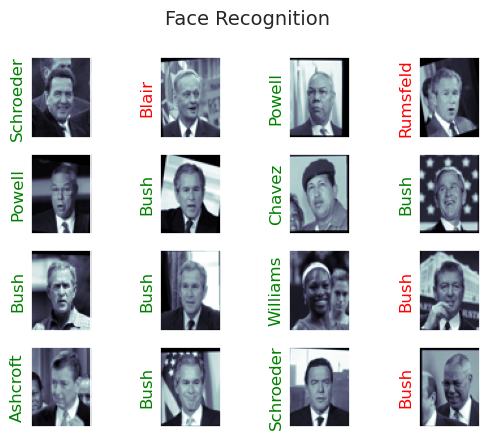

In [60]:
fig,ax=plt.subplots(4,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
    fig.suptitle("Face Recognition Model", size=14)


In [61]:
#we can draw confusion matrix.... which image is get confused with which

In [62]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.44      0.52        16
     Colin Powell       0.74      0.80      0.77        46
  Donald Rumsfeld       0.69      0.46      0.55        24
    George W Bush       0.65      0.95      0.78       105
Gerhard Schroeder       0.72      0.57      0.63        23
      Hugo Chavez       1.00      0.38      0.55        21
   Jacques Chirac       0.86      0.43      0.57        14
    Jean Chretien       0.83      0.38      0.53        13
    John Ashcroft       1.00      0.45      0.62        11
Junichiro Koizumi       1.00      0.78      0.88         9
  Serena Williams       1.00      0.83      0.91         6
       Tony Blair       0.65      0.71      0.68        24

         accuracy                           0.71       312
        macro avg       0.82      0.60      0.67       312
     weighted avg       0.74      0.71      0.69       312



Text(109.44999999999996, 0.5, 'Predicted label')

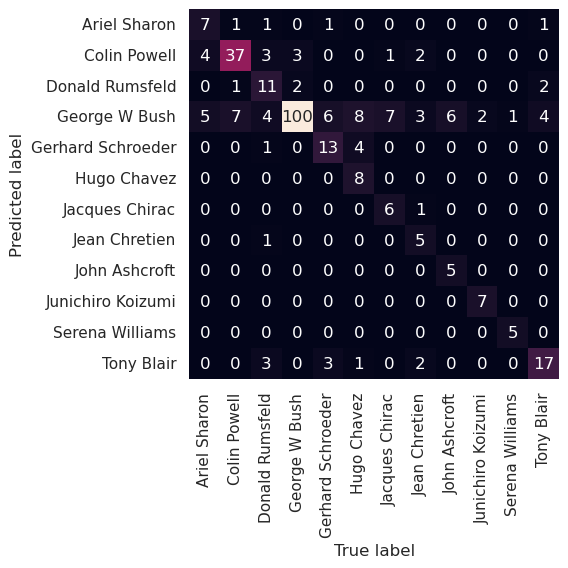

In [67]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("Predicted label")